<a href="https://colab.research.google.com/github/unoki/colabtest/blob/master/10_har_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第10章　人の活動の識別：ディープラーニングによる識別（プログラム）

第10章では、第9章で前処理を行った人の活動識別のためのたデータセットに対して、ディープラーニングで識別を行います。

### 学習項目

1. 準備
2. データの準備
3. モデルの定義
4. パラメータの設定
5. トレーニング
6. 評価



### 使用するファイル
- 10_har_dnn.ipynb （このファイルです）
- data/X_train.npy (訓練用データ)
- data/X_test.npy (テスト用データ)
- data/y_train.npy (訓練用正解ラベルデータ)
- data/y_test.npy (テスト用正解ラベルデータ)

### データセット

- UCI Machine Learning Repositoryで公開されているHuman Activity Recognition Using Smartphones Data Set から一部のデータを抜粋し、
前処理を行ったもの。
- ファイルは、NumPyで読み込み可能なバイナリ形式のフnpyファイル。


# 1. 準備
###  必要なライブラリの読み込み

- NumPy：モデル入力用のデータを作成するために使用します。
- Matplotlib：データの可視化に使用します。
- Sicket-learn：metricsパッケージ内のモジュールをモデルの評価に使用します。
- keras：ニューラルネットワークのためのライブラリです。

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
import keras.backend as K

Using TensorFlow backend.


### カレントディレクトリの移動

In [0]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd "/gdrive/My Drive/Colab Notebooks/jasla_rensyuu_20190202"

### 参照用変数の準備
- アクティビティの番号と内容の対応が取りやすくなるように、辞書型の変数を定義しておきます。
- class_num は、アクティビティの数を代入しておきます。

In [0]:
class_num = 6
class_names = {1:'Walking',
               2:'Walk upstairs', 
               3:'Walk downstairs', 
               4:'Sitting', 
               5:'Standing', 
               6:'Laying'}

### 混同行列用関数の定義
- 混同行列を見やすくする関数を定義しておきます。

In [0]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['(pred) '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

# 2.  データの読み込み
- 第9章で作成したnpyファイルを読み込みます。

In [0]:
X_train = np.load('data/X_train.npy')
Y_train = np.load('data/Y_train.npy')
X_test = np.load('data/X_test.npy')
Y_test = np.load('data/Y_test.npy')

### バックエンドのグラフ識別子をリセット

In [0]:
K.clear_session()

# 3. モデルの定義

- 2層の1次元畳み込み層を使うモデルとしました。
- summary関数で、モデルの概要を確認しておきましょう。

In [0]:
n_steps = X_train.shape[1]
n_features = X_train.shape[2]
n_outputs = Y_train.shape[1]

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=8, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=16, kernel_size=4, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 121, 32)           2336      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 118, 16)           2064      
_________________________________________________________________
dropout_1 (Dropout)          (None, 118, 16)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 59, 16)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 944)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               94500     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 606       
Total para

# 4. パラメータの設定

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

# 5. トレーニング

- fit関数でモデルのトレーニングを実行します。
- 損失関数の値の推移図をグラフで確認しておきましょう。

Text(0.5, 0, 'epoch')

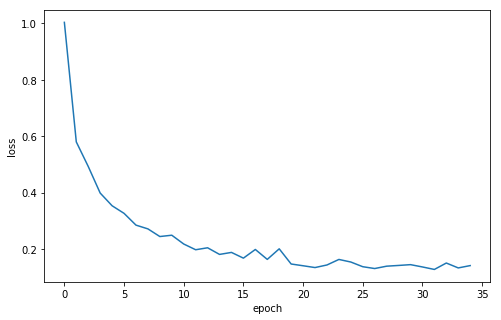

In [0]:
epochs = 35
history = model.fit(X_train, Y_train, epochs=epochs, verbose=0)

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

# 6. 評価

### テストデータからトレーニング済みモデルを使って予測

- predict_classes関数にテストデータを渡すことで、トレーニング済みモデルによる推定結果を得ることができます。
- テストデータの正解ラベルY_testはOne-Hot表現になっているため、0から5の範囲の値に戻しておきます。

In [0]:
y_pred = model.predict_classes(X_test) 
y_true = np.argmax(Y_test, axis=1) 

### 正解率
- accuracy_score関数で、正解率を算出できます。

In [0]:
accuracy_score(y_true, y_pred)

0.8785205293518833

### 混同行列
- 混同行列を確認しましょう。見やすく表示するためにpretty_confusion_matrix関数を定義していました。

In [0]:
pretty_confusion_matrix(y_true, y_pred, class_names.values())

,(pred) Walking,(pred) Walk upstairs,(pred) Walk downstairs,(pred) Sitting,(pred) Standing,(pred) Laying
Walking,456,19,2,0,19,0
Walk upstairs,37,412,6,0,16,0
Walk downstairs,5,41,374,0,0,0
Sitting,1,0,0,325,164,1
Standing,0,0,0,47,485,0
Laying,0,0,0,0,0,537


### Classification report
- classification_report関数では、精度 (Precision)や、検出率 (Recall) を表示することができます。

In [0]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       496
           1       0.87      0.87      0.87       471
           2       0.98      0.89      0.93       420
           3       0.87      0.66      0.75       491
           4       0.71      0.91      0.80       532
           5       1.00      1.00      1.00       537

   micro avg       0.88      0.88      0.88      2947
   macro avg       0.89      0.88      0.88      2947
weighted avg       0.89      0.88      0.88      2947

